<a href="https://colab.research.google.com/github/vCalum/Intelligent-Robots-for-Design/blob/main/EG505P_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training program for neural network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

data=np.load('/content/drive/MyDrive/EG505P/data.npy')
target=np.load('/content/drive/MyDrive/EG505P/target.npy')
data.shape[1:]

(50, 50, 1)

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D, Dropout

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │      31,721,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,584,963 (124.30 MB)

 Trainable params: 32,584,963 (124.30 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
history=model.fit(train_data,train_target, validation_data=(test_data,test_target), epochs=100) #50-100

Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.8281 - loss: 0.6583 - val_accuracy: 0.8840 - val_loss: 0.4226
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8706 - loss: 0.4337 - val_accuracy: 0.8840 - val_loss: 0.3442
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8590 - loss: 0.3589 - val_accuracy: 0.9021 - val_loss: 0.2383
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8801 - loss: 0.3094 - val_accuracy: 0.9510 - val_loss: 0.1811
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9228 - loss: 0.2489 - val_accuracy: 0.9588 - val_loss: 0.1313
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9486 - loss: 0.1888 - val_accuracy: 0.9536 - val_loss: 0.1356
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9452 - loss: 0.1668 - val_accuracy: 0.9665 - val_loss: 0.1198
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9563 - loss: 0.1633 -

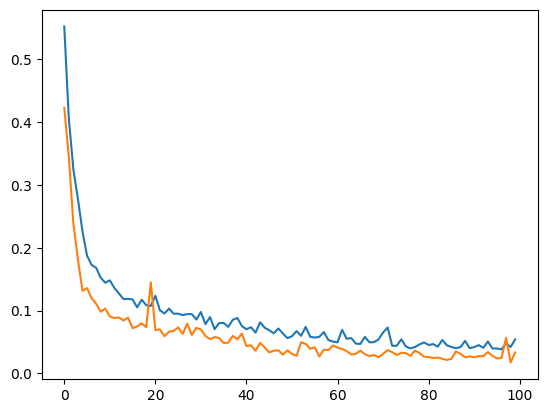

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

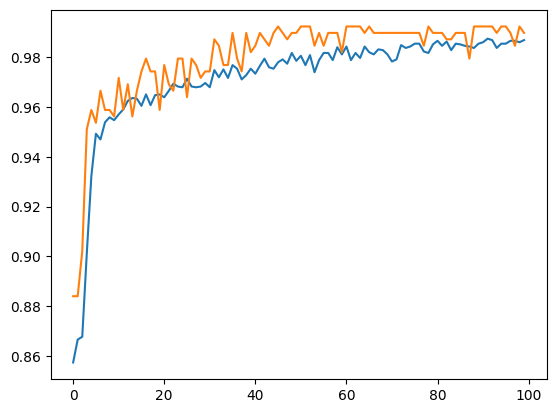

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [8]:
accc = model.evaluate(test_data,test_target)
print(accc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9948 - loss: 0.0201 
[0.033215902745723724, 0.9896907210350037]


In [10]:
model.save_weights(f'/content/drive/MyDrive/EG505P/model.weights.h5') # Change the filename to end with '.weights.h5'